## Kubo-Financiero

------------------------

### 🏦 Company Profile Report

The purpose of this notebook is to generate the plots & charts behind the Kubo blogpost.

### 🔧 Required imports & libraries

In [1]:
### Libraries and fonts & stuff

import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from highlight_text import ax_text
from datetime import datetime
from datetime import timedelta
import matplotlib as mpl
from matplotlib import image
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import matplotlib.font_manager as fm
from highlight_text import ax_text
import seaborn as sns
import math
import random

module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils")
    sys.path.append(module_path+"\\assets")

from tukan_helper_functions import get_tukan_api_request

# For creating cool charts :)
plt.style.use(module_path + '\\utils\\tukan_style.mpl')

In [2]:
print(mpl.get_cachedir())
fm.findfont("Roboto", fontext='ttf', directory=None, fallback_to_default=True, rebuild_if_missing=True)

C:\Users\MiguelAngel\.matplotlib


'c:\\Users\\MiguelAngel\\Documents\\Miguel\\TUKAN\\tukan_notebooks\\assets\\fonts\\Roboto\\Roboto-Regular.ttf'

In [3]:
path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Teko\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x.split(
                "-")[0].split(".")[0])
        except:
            x

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Roboto\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x.split(
                "-")[0].split(".")[0])
        except:
            x

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Dosis\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x.split(
                "-")[0].split(".")[0])
        except:
            x

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Comfortaa\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x.split(
                "-")[0].split(".")[0])
            print(x.split(
                "-")[0].split(".")[0])
        except:
            x

Comfortaa
Comfortaa
Comfortaa
Comfortaa
Comfortaa


### 📈 Kubo's basic indicators

Here we visualize the loan growth of Kubo.

In [4]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_sofipos_balance_sheet",
            "variables": [
                "b4ea69bfe2b9735",
                "aa9a4f2f8a95db3",
                "f26c53c213511d1",
                "893fe1f7da06f33"
            ]
        }
    ],
    "from": "2012-01-01",
}

data_sofipos = get_tukan_api_request(payload)["data"]

Success getting the data


In [5]:
data_sofipos.loc[:,"total_loans"] = data_sofipos["aa9a4f2f8a95db3"] + data_sofipos["b4ea69bfe2b9735"]
data_sofipos.loc[:,"total_funding"] = data_sofipos["f26c53c213511d1"] + data_sofipos["893fe1f7da06f33"]

In [6]:
data_kubo = data_sofipos[data_sofipos["institutions__ref"] == "9d10d891ec67681"].copy()
data_kubo.loc[:,"loan_to_funding"] = data_kubo["total_loans"]/data_kubo["total_funding"]

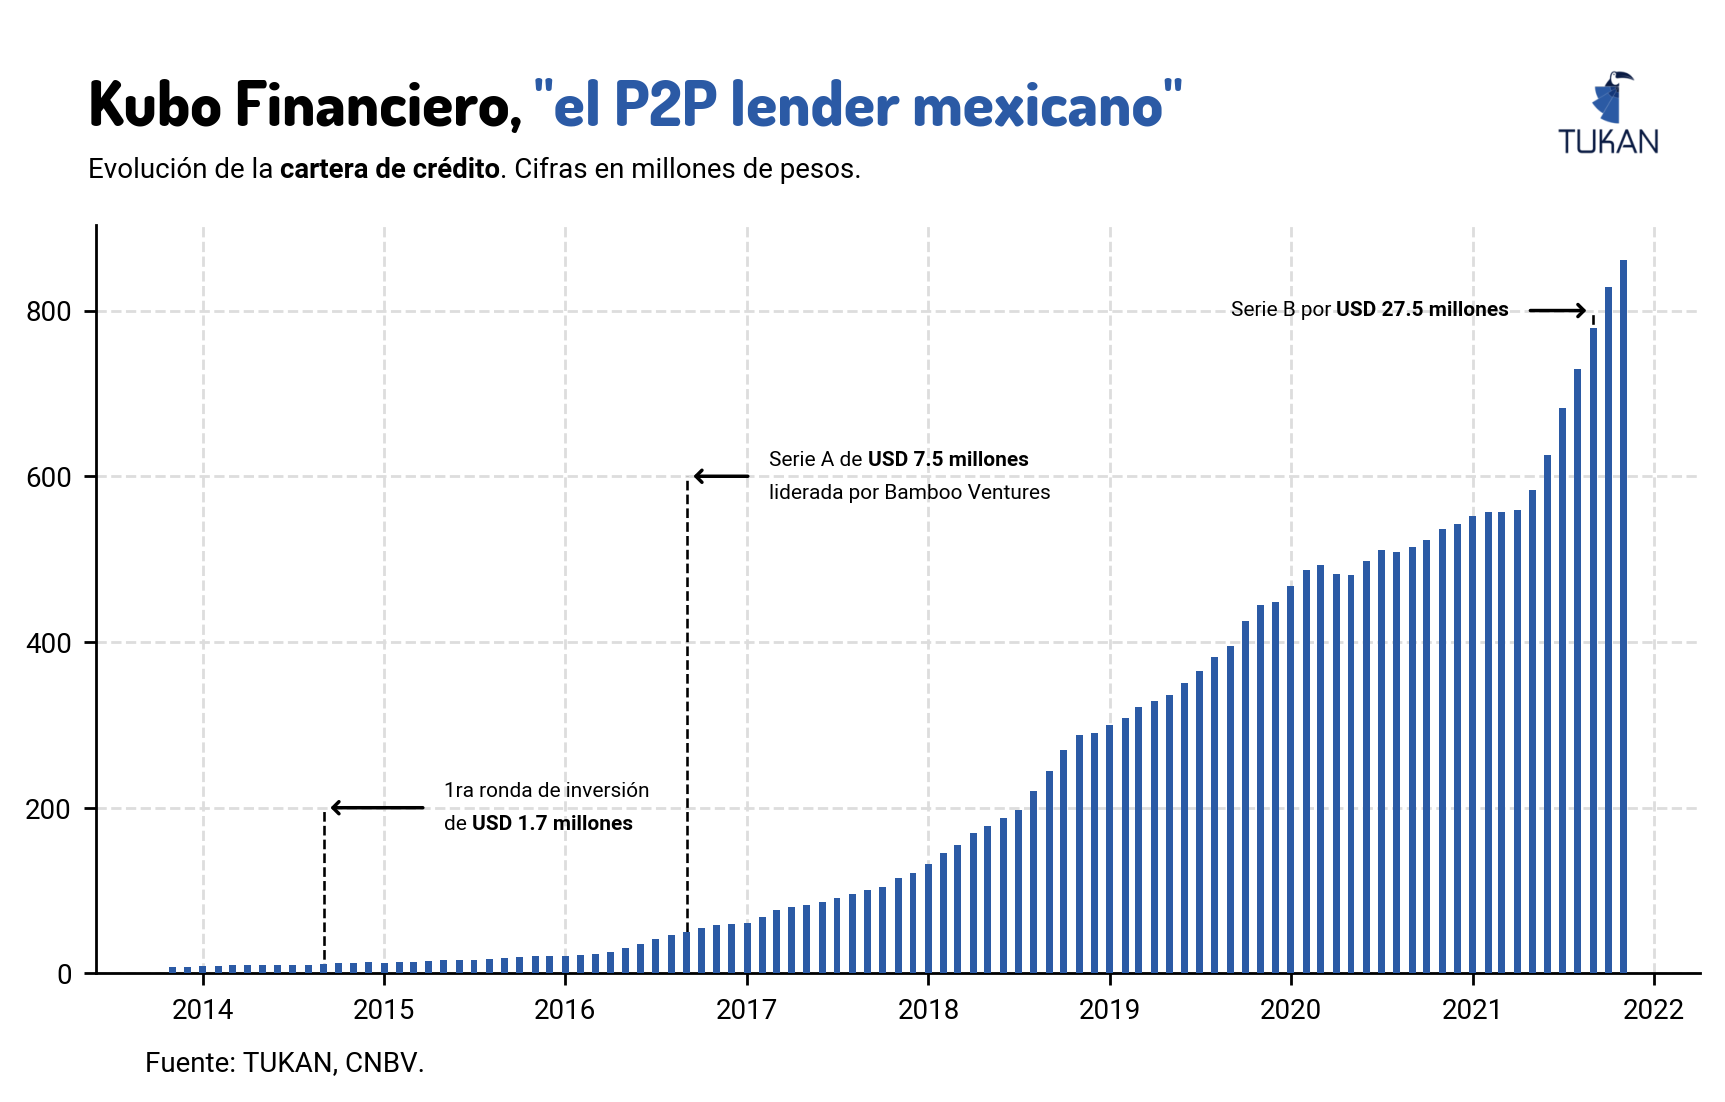

In [7]:
fig = plt.figure(figsize=(7,3.5), dpi = 250, facecolor = "white")
ax = plt.subplot(111)

ax.tick_params(axis='both', which='both', labelsize=8)


# - The plot

ax.bar(data_kubo["date"], data_kubo["total_loans"]/1000000, width=14, zorder = 3)

# - Investment rounds

inv_rounds = [datetime(2014,9,1), datetime(2016,9,1), datetime(2021,9,1)]
inv_rounds_text = ["1ra ronda de inversión\nde <USD 1.7 millones>",
                  "Serie A de <USD 7.5 millones>\nliderada por Bamboo Ventures",
                  "Serie B por <USD 27.5 millones>"]
inv_rounds_y = [200,600,800]
Y_max = ax.get_ylim()[1]
for index, i in enumerate(inv_rounds):
   if index == 2:
      aux_sign = -1
   else:
      aux_sign = 1
   ax.plot([i,i],[0,inv_rounds_y[index]], ls = '--', color = "black", lw = 0.75)
   ax_text(x = i, y = inv_rounds_y[index],
            s = inv_rounds_text[index],
            highlight_textprops=[{"weight":"bold"}],
            ax = ax, weight = "normal", family = "Roboto", ha = "center", va = "center",size = 6, 
            annotationbbox_kw = {"xycoords":"data", 'arrowprops': dict(arrowstyle="->,head_length=0.05,head_width=0.05"), 
            'xybox':(i + aux_sign*timedelta(450),inv_rounds_y[index])},
            )


# - Title and subtitle

ax_text(x = 0.05, y = 1.17,
        s = 'Kubo Financiero, <"el P2P lender mexicano">',
        highlight_textprops = [{"color": "#2B5AA5"}],
        ax = ax, weight = "bold", family = "Dosis", ha = "left", size = 18, annotationbbox_kw = {"xycoords":"figure fraction"})
ax_text(x = 0.05, y = 1.08,
        s = 'Evolución de la <cartera de crédito>. Cifras en millones de pesos.',
        highlight_textprops=[{"weight":"bold"}],
        ax = ax, weight = "normal", family = "Roboto", ha = "left", size = 8, annotationbbox_kw = {"xycoords":"figure fraction"})


# Logo and Caption
plt.tight_layout()

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.8, 1, 0.17, 0.17], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

fig.text(0.09, -0.01, "Fuente: TUKAN, CNBV.", fontsize=8)

plt.savefig(
    "plots/kubo_loan_growth.png",
    dpi=300,
    bbox_inches="tight",
    edgecolor="none",
    transparent=True,
)


plt.savefig(
    "plots/kubo_loan_growth_white.png",
    dpi=300,
    bbox_inches="tight",
    edgecolor="none",
    transparent=False,
)


Now we compute total deposits generated by Kubo

In [8]:
print(f"Kubo had a total of {data_kubo['total_funding'].iloc[-1]/1000000:,.1f} in total deposits as of {data_kubo['date'].iloc[-1]}")
print(f"Kubo had a total of {data_kubo['total_loans'].iloc[-1]/1000000:,.1f} in total loans as of {data_kubo['date'].iloc[-1]}")

Kubo had a total of 1,192.7 in total deposits as of 2021-11-01 00:00:00
Kubo had a total of 860.5 in total loans as of 2021-11-01 00:00:00


### ➗ NPL Across all Sectors

The goal here is to compare Kubo's NPL ratio with the rest of the financial system.

In [9]:
# SOFOMEs ENR
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "institutions"
    ],
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_condusef_sofom_enr_loan_portfolio",
            "variables": [
                "b4ea69bfe2b9735",
                "aa9a4f2f8a95db3"
            ]
        }
    ]
}

sofomes_npl = get_tukan_api_request(payload)["data"]
sofomes_npl.loc[:,"ca895c92786b406"] = sofomes_npl["b4ea69bfe2b9735"]/(sofomes_npl["b4ea69bfe2b9735"] + sofomes_npl["aa9a4f2f8a95db3"])
sofomes_npl = sofomes_npl[["date","ca895c92786b406","institutions"]]
sofomes_npl.loc[:,"type"] = "SOFOMes No Reguladas"

Success getting the data


In [10]:
# SOFOMEs ER
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_sofomers_balance_sheet",
            "variables": [
                "b4ea69bfe2b9735",
                "aa9a4f2f8a95db3"
            ]
        }
    ]
}

sofomers_npl = get_tukan_api_request(payload)["data"]
sofomers_npl.loc[:,"ca895c92786b406"] = sofomers_npl["b4ea69bfe2b9735"]/(sofomers_npl["b4ea69bfe2b9735"] + sofomers_npl["aa9a4f2f8a95db3"])
sofomers_npl = sofomers_npl[["date","ca895c92786b406","institutions"]]
sofomers_npl.loc[:,"type"] = "SOFOMes Reguladas"

Success getting the data


In [11]:
# Development Banks
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_db_balance_sheet",
            "variables": [
                "b4ea69bfe2b9735",
                "aa9a4f2f8a95db3"
            ]
        }
    ]
}

dev_banks_npl = get_tukan_api_request(payload)["data"]
dev_banks_npl.loc[:,"ca895c92786b406"] = dev_banks_npl["b4ea69bfe2b9735"]/(dev_banks_npl["b4ea69bfe2b9735"] + dev_banks_npl["aa9a4f2f8a95db3"])
dev_banks_npl = dev_banks_npl[["date","ca895c92786b406","institutions"]]
dev_banks_npl.loc[:,"type"] = "SOFOMes Reguladas"

Success getting the data


In [12]:
# NPL Ratios Credit Unions

payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_cu_financial_ratios",
            "variables": [
                "ca895c92786b406"
            ]
        }
    ]
}

credit_union_npl = get_tukan_api_request(payload)["data"]
credit_union_npl.loc[:,"type"] = "Uniones de Crédito"

Success getting the data


In [13]:
# NPL Ratios Commercial Banks

payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_cb_financial_ratios",
            "variables": [
                "ca895c92786b406"
            ]
        }
    ]
}

commercial_banks_npl = get_tukan_api_request(payload)["data"]
commercial_banks_npl.loc[:,"type"] = "Instituciones de Banca Múltiple"

Success getting the data


In [14]:
# NPL Ratios SOFIPOs

payload ={
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by":[
       "institutions"
    ],
    "categories": {
        "institutions": "all",
        "loan_type": [
            "50a31841f9eef69"
        ]
    },
    "request": [
        {
            "table": "mex_cnbv_sofipos_loan_portfolio",
            "variables": [
                "ca895c92786b406"
            ]
        }
    ]
}

sofipos_npl = get_tukan_api_request(payload)["data"]
sofipos_npl.loc[:,"type"] = "SOFIPOs"

Success getting the data


In [15]:
marked = ["Banorte", "BBVA Bancomer", "Fincomún Servicios Financieros Comunitarios", "Banco del Bienestar", "Konfío", "Credijusto", "Stori", "Banco Finterra", "Libertad Servicios Financieros"]

In [16]:
data = pd.concat([commercial_banks_npl,dev_banks_npl,sofipos_npl,sofomers_npl,credit_union_npl,sofomes_npl])
data.loc[data["institutions"].isin(marked),"type"] = "marked"
data.loc[~data["institutions"].isin(marked),"type"] = "unmarked"
data.loc[data["institutions"] == "Ku-Bo Financiero","type"] = "kubo"
data.loc[:,"date"] = "1"
data = data[data["ca895c92786b406"] > 0.0005].copy()
data.reset_index(drop = True, inplace = True)

data.replace({"institutions":{"Fincomún Servicios Financieros Comunitarios":"Fincomún", "BBVA Bancomer": "BBVA", "Libertad Servicios Financieros": "Libertad S.F."}}, inplace = True)

In [23]:
data[(data["ca895c92786b406"] <= .05) & (data["ca895c92786b406"] > .0)]

,date,institutions__ref,institutions,ca895c92786b406,type
0,1,02ab4b407c039ca,Banorte,0.009667,marked
1,1,055afc15dac6def,Ve Por Más,0.029079,unmarked
3,1,0755b06e35e0d3d,Intercam Banco,0.016855,unmarked
4,1,0ba100f70c128de,Banco Azteca,0.046650,unmarked
5,1,0c959ae6bc0d063,Instituciones de banca múltiple,0.020510,unmarked
...,...,...,...,...,...
1083,1,NaN,Cofine,0.018208,unmarked
1085,1,NaN,Negocios y Proyectos,0.016318,unmarked
1087,1,NaN,GLN Gestión,0.025603,unmarked
1089,1,NaN,Impulsora Agrocomercial,0.019516,unmarked


In [142]:
marked_annotate = data[data["type"] != "unmarked"]
marked_annotate

,date,institutions__ref,institutions,ca895c92786b406,type
0,1,02ab4b407c039ca,Banorte,0.009667,marked
29,1,ae882fe094ece03,BBVA,0.017302,marked
30,1,d2854adff287217,Banco Finterra,0.199875,marked
36,1,NaN,Banco del Bienestar,0.354617,marked
52,1,2a8a82428fb67a5,Fincomún,0.017619,marked
58,1,609f19b3f2f337f,Libertad S.F.,0.211317,marked
62,1,9d10d891ec67681,Ku-Bo Financiero,0.040699,kubo
75,1,NaN,Credijusto,0.051243,marked
316,1,NaN,Konfío,0.030196,marked
361,1,NaN,Stori,0.096314,marked


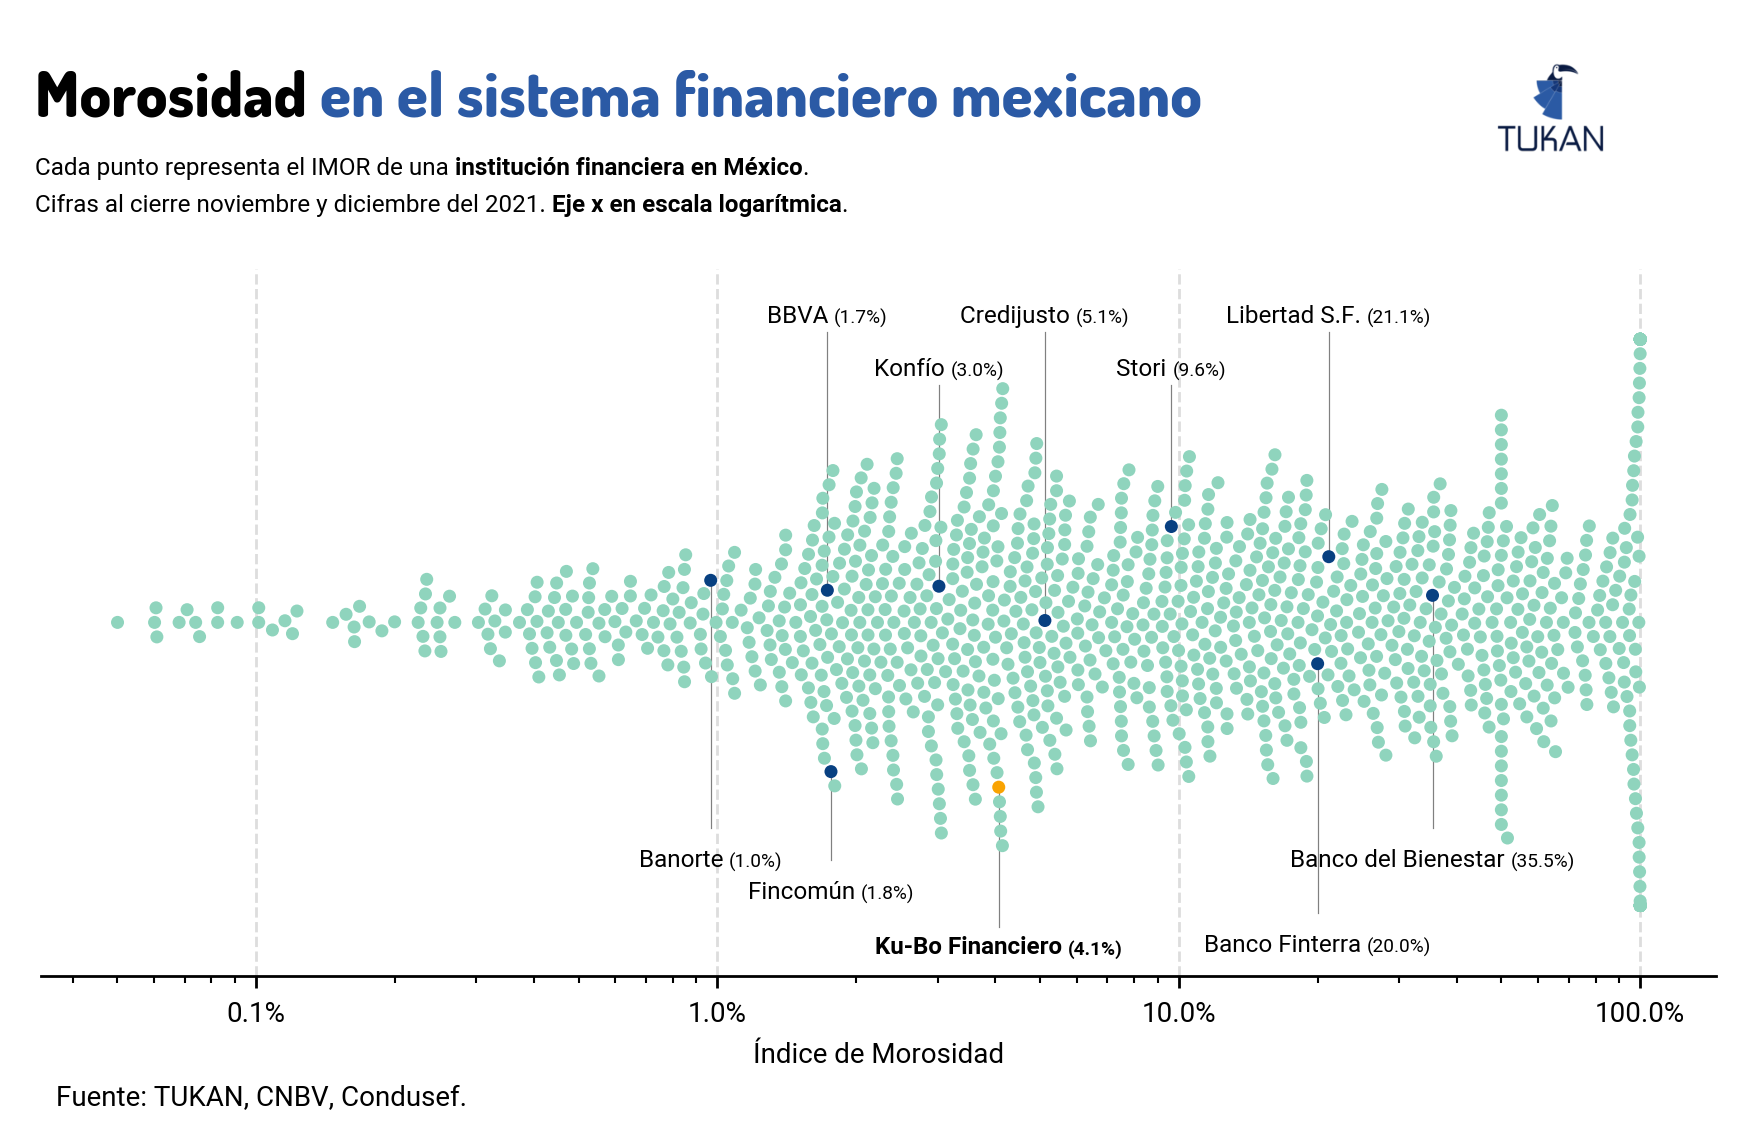

In [237]:
fig = plt.figure(figsize=(7,3.5), dpi = 250, facecolor="white")
ax = plt.subplot(111)


# -----------------
# Data axes

ax.tick_params(axis='both', which='both', labelsize=8)
ax.spines["left"].set_visible(False)
ax.get_yaxis().set_visible(False)
tukan_palette = mpl.cm.get_cmap("GnBu_r", 10)
tukan_palette = [tukan_palette(0), tukan_palette(5), "#F9A302"]
sns.set_palette(palette=tukan_palette)
ax.set_xscale("log")
sns.swarmplot(x="ca895c92786b406", y = "date", ax = ax, hue = "type",data = data, dodge = False, size=3.75)
ax.legend([],[], frameon = False)
ax.xaxis.set_label_text("Índice de Morosidad", fontsize = 8)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1%}"))



# -----------------
# Annotate Main Companies

npls = data[data["type"] == "marked"]
npls = npls.sort_values(by = "ca895c92786b406")
x_s = ax.collections[0].get_offsets()
marked = []
for point in npls["ca895c92786b406"]:
   for x in x_s:
      if math.isclose(point, x[0]):
         marked.append(x)

Y_uplim = ax.get_ylim()[1]
Y_lolim = ax.get_ylim()[0]

aux_prop_u = 0
aux_prop_o = 0
prop_Y = .72

for index, x in enumerate(marked):
   if x[1] >= -0.00094:
      offset_Y = -6
      if aux_prop_u % 2 == 0:
         prop_Y = .67
      else:
         prop_Y = .82
      aux_prop_u += 1
      Y_ = Y_lolim*prop_Y
   else:
      offset_Y = 8
      if aux_prop_o % 2 == 0:
         prop_Y = .67
      else:
         prop_Y = .82
      aux_prop_o += 1
      Y_ = Y_uplim*prop_Y
   if npls['institutions'].iloc[index] in ["Banco del Bienestar","Banorte"]:
      Y_ = Y_lolim*.58
      offset_Y = -6
   ax.plot([x[0],x[0]],[x[1],Y_], color = "gray", ls = "-", lw = 0.35)
   ax_text(
      x = x[0], y = Y_,
      s = f"{npls['institutions'].iloc[index]} <({npls['ca895c92786b406'].iloc[index]:,.1%})>",
      size = 7,
      highlight_textprops=[{"size":5.5}],
      ha = "center",
      annotationbbox_kw = {"xycoords":"data",
      'xybox':(0, offset_Y), 'boxcoords':"offset points"}
   )

# -----------------
# Annotate Ku-Bo Financiero

kubo = data[data["type"] == "kubo"]
marked = []
for point in kubo["ca895c92786b406"]:
   for x in x_s:
      if math.isclose(point, x[0]):
         marked.append(x)

x = marked[0]
Y_ = Y_lolim*0.86
ax.plot([x[0],x[0]],[x[1],Y_], color = "gray", ls = "-", lw = 0.35)
ax_text(
   x = x[0], y = Y_,
   s = f"{kubo['institutions'].iloc[0]} <({kubo['ca895c92786b406'].iloc[0]:,.1%})>",
   size = 7,
   highlight_textprops=[{"size":5.5}],
   weight = "bold",
   ha = "center",
   annotationbbox_kw = {"xycoords":"data", 'xybox':(0, -2.5), 'boxcoords':"offset points", "zorder":1}
)

# - Title and subtitle

ax_text(x = 0.02, y = 1.22,
        s = 'Morosidad <en el sistema financiero mexicano>',
        highlight_textprops = [{"color": "#2B5AA5"}],
        ax = ax, weight = "bold", family = "Dosis", ha = "left", size = 18, annotationbbox_kw = {"xycoords":"figure fraction"})
ax_text(x = 0.02, y = 1.12,
        s = 'Cada punto representa el IMOR de una <institución financiera en México>.\nCifras al cierre noviembre y diciembre del 2021. <Eje x en escala logarítmica>.',
        highlight_textprops=[{"weight":"bold"},{"weight":"bold"}],
        ax = ax, weight = "normal", family = "Roboto", ha = "left", size = 7, annotationbbox_kw = {"xycoords":"figure fraction"})


# Logo and Caption
plt.tight_layout()

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.75, 1.05, 0.18, 0.18], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

fig.text(0.03, -0.0, "Fuente: TUKAN, CNBV, Condusef.", fontsize=8)

plt.savefig(
    "plots/kubo_npl_ratio.png",
    dpi=300,
    bbox_inches="tight",
    edgecolor="none",
    transparent=True,
)


plt.savefig(
    "plots/kubo_npl_ratio_white.png",
    dpi=250,
    bbox_inches="tight",
    edgecolor="none",
    transparent=False,
)

### TCAC de las Financieras

In [243]:
data_kubo["total_loans"] = data_kubo["total_loans"]/1000000
data_kubo["total_funding"] = data_kubo["total_funding"]/1000000

In [244]:
data_kubo[data_kubo["date"] == "2018-01-01"]

,date,institutions__ref,institutions,893fe1f7da06f33,aa9a4f2f8a95db3,b4ea69bfe2b9735,f26c53c213511d1,total_loans,total_funding,loan_to_funding
3145,2018-01-01,9d10d891ec67681,Ku-Bo Financiero,97941896.61,1.271442e+08,5119764.49,14616672.66,132.263966,112.558569,1.175068


In [245]:
data_kubo[data_kubo["date"] == "2021-11-01"]

,date,institutions__ref,institutions,893fe1f7da06f33,aa9a4f2f8a95db3,b4ea69bfe2b9735,f26c53c213511d1,total_loans,total_funding,loan_to_funding
4908,2021-11-01,9d10d891ec67681,Ku-Bo Financiero,1.077450e+09,8.254893e+08,35021888.62,1.152153e+08,860.511211,1192.665318,0.721503


In [248]:
1/0.721503

1.3859956230258226

In [256]:
# SOFOMEs ER
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_condusef_sofom_enr_loan_portfolio",
            "variables": [
                "b4ea69bfe2b9735",
                "aa9a4f2f8a95db3"
            ]
        }
    ],
    "from": "2018-01-01"
}

sofomers_growth = get_tukan_api_request(payload)["data"]

Success getting the data


In [261]:
sofomers_growth = sofomers_growth[sofomers_growth["institutions"].isin(["Konfío", "Credijusto"])]
sofomers_growth.loc[:,"total_loans"] = sofomers_growth["aa9a4f2f8a95db3"] + sofomers_growth["b4ea69bfe2b9735"]

data_kubo = data_sofipos[data_sofipos["institutions"].isin(["Ku-Bo Financiero", "Crediclub"])]
data_kubo.loc[:,"total_loans"] = data_kubo["aa9a4f2f8a95db3"] + data_kubo["b4ea69bfe2b9735"]

sofomers_growth[sofomers_growth["date"].isin(["2018-01-01","2021-07-01","2021-10-01"])]

c:\Users\MiguelAngel\Documents\Miguel\TUKAN\tukan_notebooks\.TukanEnv\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,date,institutions__ref,institutions,aa9a4f2f8a95db3,b4ea69bfe2b9735,total_loans
172,2018-01-01,237b57d15a5a398,Konfío,1.993434e+08,16337791.0,2.156812e+08
272,2018-01-01,3a61b68daf2528f,Credijusto,2.781212e+08,20729367.0,2.988505e+08
17318,2021-07-01,237b57d15a5a398,Konfío,3.767373e+09,113285700.0,3.880659e+09
17424,2021-07-01,3a61b68daf2528f,Credijusto,1.259418e+09,70210827.0,1.329629e+09
18556,2021-10-01,237b57d15a5a398,Konfío,3.869336e+09,120474644.0,3.989811e+09


In [260]:
data_kubo[data_kubo["date"].isin(["2018-01-01","2021-07-01","2021-10-01"])]

,date,institutions__ref,institutions,893fe1f7da06f33,aa9a4f2f8a95db3,b4ea69bfe2b9735,f26c53c213511d1,total_loans,total_funding
3144,2018-01-01,99e60417c28f5e2,Crediclub,1.885205e+08,8.812847e+08,7437473.48,6.576211e+07,8.887221e+08,2.542826e+08
3145,2018-01-01,9d10d891ec67681,Ku-Bo Financiero,9.794190e+07,1.271442e+08,5119764.49,1.461667e+07,1.322640e+08,1.125586e+08
4759,2021-07-01,99e60417c28f5e2,Crediclub,1.306805e+09,1.684595e+09,19987062.41,4.670520e+08,1.704582e+09,1.773857e+09
4760,2021-07-01,9d10d891ec67681,Ku-Bo Financiero,1.040916e+09,6.534109e+08,28663857.37,1.192628e+08,6.820748e+08,1.160179e+09
4870,2021-10-01,99e60417c28f5e2,Crediclub,1.322116e+09,1.731999e+09,18947320.28,5.115315e+08,1.750946e+09,1.833648e+09
4871,2021-10-01,9d10d891ec67681,Ku-Bo Financiero,1.087838e+09,7.957292e+08,32740318.51,1.130012e+08,8.284696e+08,1.200839e+09


In [267]:
(8.284696e+08/1.322640e+08)**(12/35)-1

0.8758605297876922

In [268]:
cagr = {
   "inst": ["Ku-Bo Financiero", "Konfío", "Credijusto", "Crediclub"],
   "cagr": [0.866,1.644,0.644,0.237]
}

cagr = pd.DataFrame(cagr)
cagr.sort_values(by = "cagr", ascending=False, inplace = True)

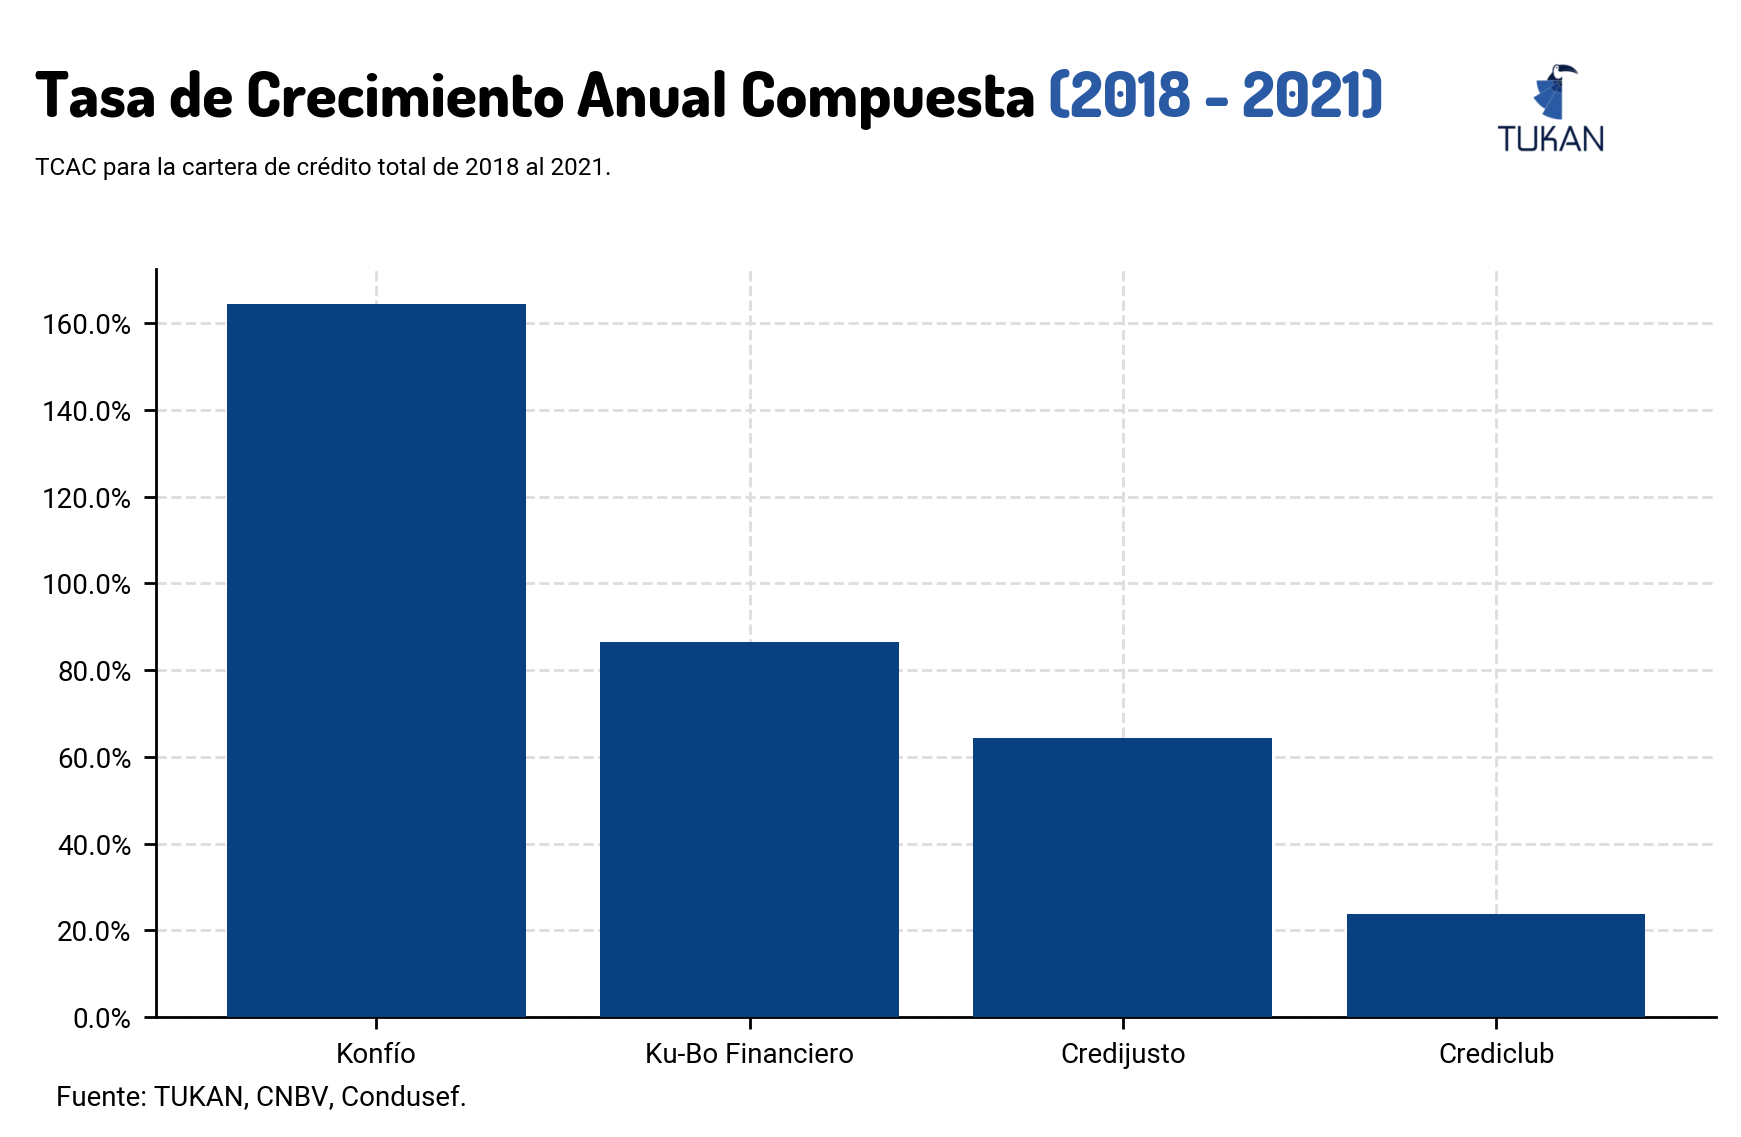

In [273]:
fig = plt.figure(figsize=(7,3.5), dpi = 250, facecolor="white")
ax = plt.subplot(111)


ax.tick_params(axis='both', which='both', labelsize=8)

# -----------------
# Data axes

ax.bar(x=cagr["inst"], height = cagr["cagr"], zorder = 3)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1%}"))

# - Title and subtitle

ax_text(x = 0.02, y = 1.22,
        s = 'Tasa de Crecimiento Anual Compuesta <(2018 - 2021)>',
        highlight_textprops = [{"color": "#2B5AA5"}],
        ax = ax, weight = "bold", family = "Dosis", ha = "left", size = 18, annotationbbox_kw = {"xycoords":"figure fraction"})
ax_text(x = 0.02, y = 1.12,
        s = 'TCAC para la cartera de crédito total de 2018 al 2021.',
        ax = ax, weight = "normal", family = "Roboto", ha = "left", size = 7, annotationbbox_kw = {"xycoords":"figure fraction"})


# Logo and Caption
plt.tight_layout()

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.75, 1.05, 0.18, 0.18], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

fig.text(0.03, -0.0, "Fuente: TUKAN, CNBV, Condusef.", fontsize=8)

plt.savefig(
    "plots/kubo_tcac_ratio.png",
    dpi=300,
    bbox_inches="tight",
    edgecolor="none",
    transparent=True,
)


plt.savefig(
    "plots/kubo_tcac_ratio_white.png",
    dpi=250,
    bbox_inches="tight",
    edgecolor="none",
    transparent=False,
)

In [289]:
banks_npl = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "institutions"
    ],
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_cb_balance_sheet",
            "variables": [
                "aa9a4f2f8a95db3",
                "ef7f7c74906f369",
                "b4ea69bfe2b9735",
                "4fff36d83241bb2"
            ]
        }
    ],
    "from": "2014-01-01"
}

data_banks = get_tukan_api_request(banks_npl)

Success getting the data


In [290]:
data_banks = data_banks["data"]
data_banks.loc[:,"total_p_loans"] = data_banks["ef7f7c74906f369"] + data_banks["4fff36d83241bb2"]
data_banks.loc[:,"npl_p_loans"] = data_banks["4fff36d83241bb2"]/data_banks["ef7f7c74906f369"]
data_banks.loc[:,"total_loans"] = data_banks["aa9a4f2f8a95db3"] + data_banks["b4ea69bfe2b9735"]
data_banks.loc[:,"p_t"] = data_banks["total_p_loans"]/data_banks["total_loans"]

data_banks = data_banks[data_banks["institutions"].isin(["Banco Compartamos", "BanCoppel", "Consubanco", "Banco Azteca"])].copy()

In [291]:
data_banks

,date,institutions__ref,institutions,4fff36d83241bb2,aa9a4f2f8a95db3,b4ea69bfe2b9735,ef7f7c74906f369,total_p_loans,npl_p_loans,total_loans,p_t
3,2014-01-01,06d60d5f89f9570,BanCoppel,1.098705e+08,8.656511e+09,1.374680e+09,1.138487e+09,1.248358e+09,0.096506,1.003119e+10,0.124448
5,2014-01-01,0ba100f70c128de,Banco Azteca,3.276135e+09,5.656886e+10,5.242600e+09,2.798514e+10,3.126128e+10,0.117067,6.181146e+10,0.505752
22,2014-01-01,711e0cda1f52606,Consubanco,1.641942e+08,3.751449e+09,1.674158e+08,3.654610e+09,3.818804e+09,0.044928,3.918865e+09,0.974467
43,2014-01-01,f42086d94c82694,Banco Compartamos,NaN,1.633744e+10,4.912495e+08,NaN,NaN,NaN,1.682869e+10,NaN
48,2014-02-01,06d60d5f89f9570,BanCoppel,1.105346e+08,8.396287e+09,1.653544e+09,1.165700e+09,1.276235e+09,0.094822,1.004983e+10,0.126991
...,...,...,...,...,...,...,...,...,...,...,...
4583,2021-11-01,f42086d94c82694,Banco Compartamos,1.400690e+08,2.789811e+10,4.856610e+08,5.789833e+09,5.929902e+09,0.024192,2.838377e+10,0.208919
4587,2021-12-01,06d60d5f89f9570,BanCoppel,6.139675e+08,2.958728e+10,2.490589e+09,5.718850e+09,6.332817e+09,0.107359,3.207787e+10,0.197420
4589,2021-12-01,0ba100f70c128de,Banco Azteca,3.308768e+09,1.174504e+11,5.747150e+09,4.270885e+10,4.601761e+10,0.077473,1.231976e+11,0.373527
4610,2021-12-01,711e0cda1f52606,Consubanco,2.745085e+08,1.062809e+10,3.702052e+08,9.062473e+09,9.336982e+09,0.030291,1.099829e+10,0.848948


In [296]:
kubo = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "institutions",
        "loan_type"
    ],
    "categories": {
        "institutions": [
            "9d10d891ec67681"
        ],
        "loan_type": [
            "50a31841f9eef69"
        ]
    },
    "request": [
        {
            "table": "mex_cnbv_sofipos_loan_portfolio",
            "variables": [
                "ca895c92786b406"
            ]
        }
    ],
    "from": "2014-01-29"
}

data_kubo = get_tukan_api_request(kubo)["data"]

Success getting the data


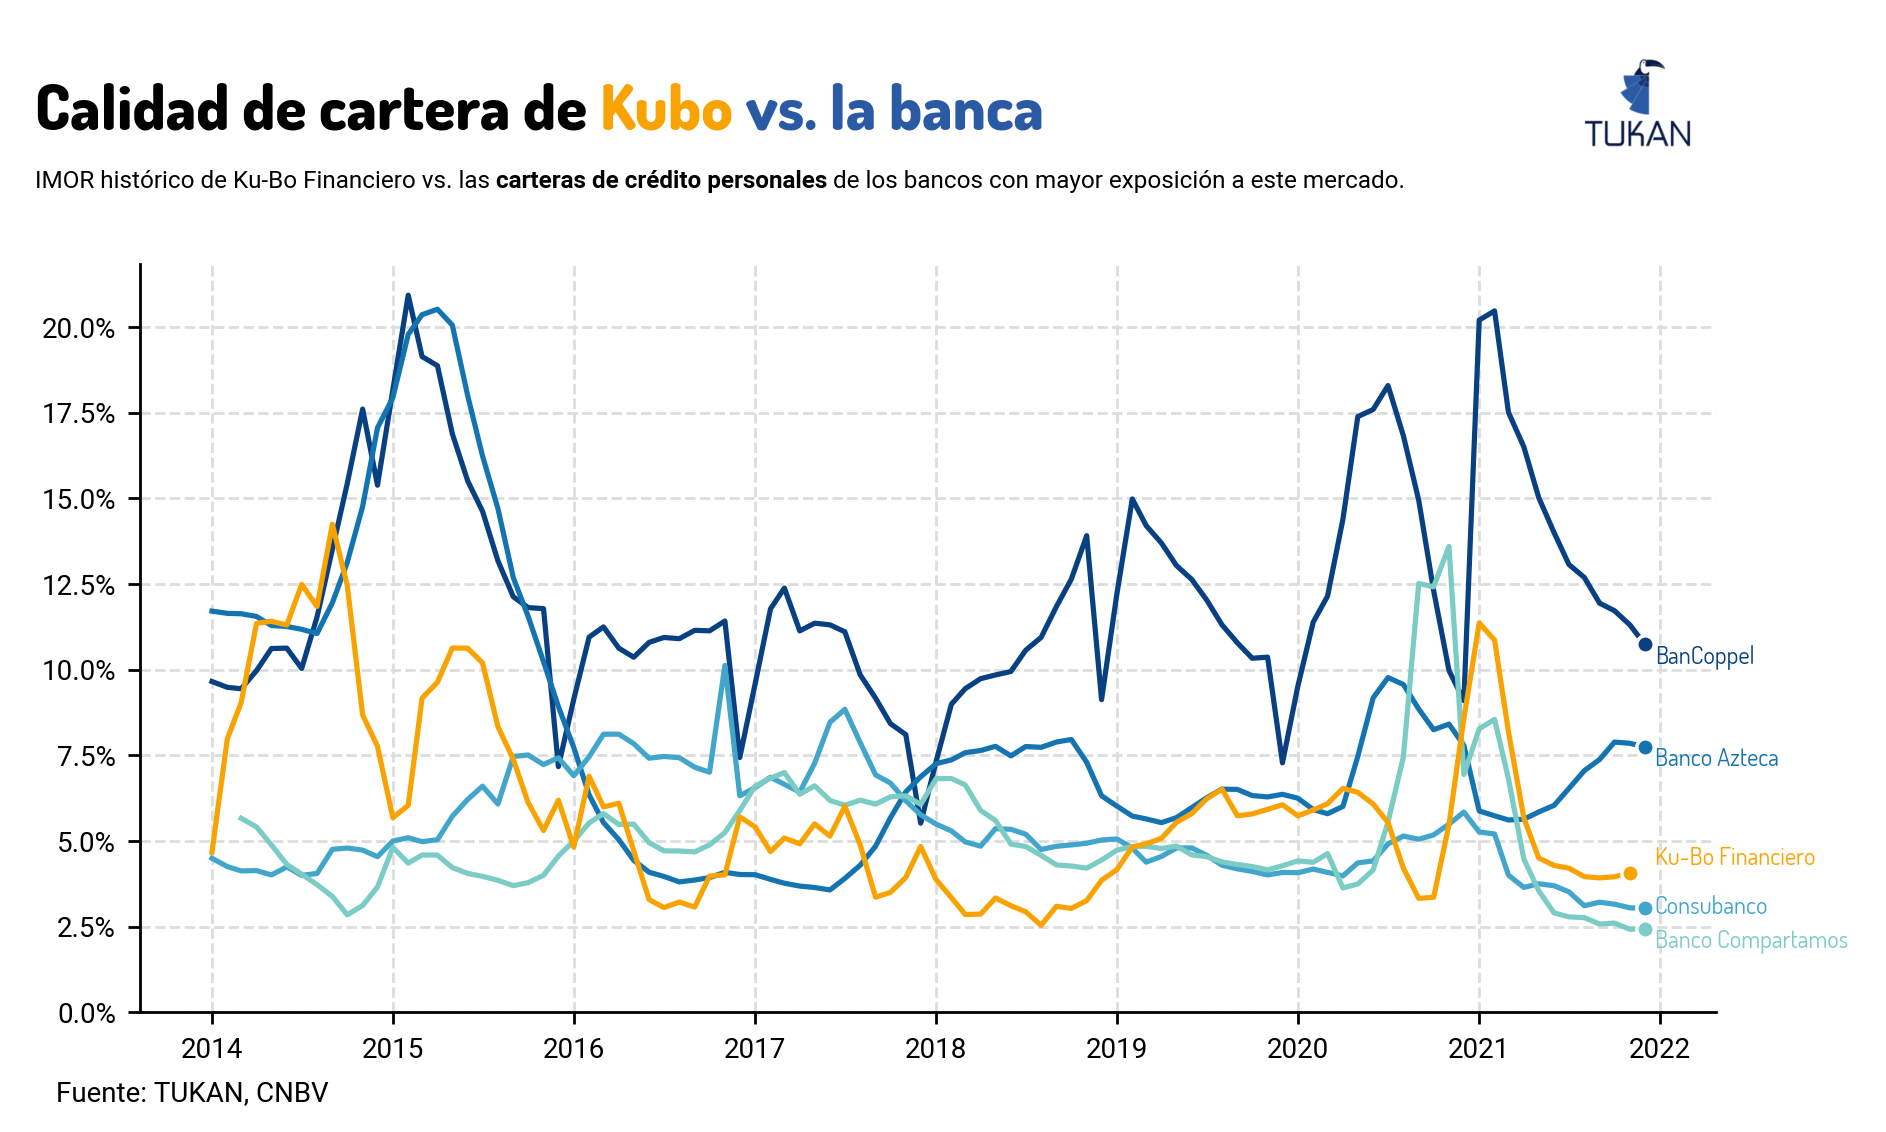

In [335]:
fig = plt.figure(figsize=(7,3.5), dpi = 250, facecolor="white")
ax = plt.subplot(111)


ax.tick_params(axis='both', which='both', labelsize=8)
    
X_min = data_banks["date"].min()
X_max = data_banks["date"].max()

sort_activities = data_banks[data_banks["date"] == data_banks["date"].max()].sort_values(by = "npl_p_loans", ascending = False)
activities = list(sort_activities['institutions'].unique())
cmap = mpl.cm.get_cmap("GnBu_r", 7) # So we don't get very light colors

for index, activity in enumerate(activities):
    plot_data_banks_aux = data_banks[data_banks["institutions"] == activity].copy()
    ax.plot(plot_data_banks_aux["date"], plot_data_banks_aux["npl_p_loans"], marker = "o", markevery = [-1], color = cmap(index), mec = "white", ms = 5)
    Y_end = plot_data_banks_aux["npl_p_loans"].iloc[-1]
    if activity == "Consubanco":
        Y_end = Y_end + 0.004
    elif activity == "Fishing & hunting":
        Y_end = Y_end + 0.01
    ax_text(x = X_max + timedelta(20), y = Y_end,
            s = f"<{activity}>",
            highlight_textprops=[{"color": cmap(index)}], 
                                ax = ax, weight = "bold", font = "Dosis", ha = "left", size = 7)

ax.plot(data_kubo["date"], data_kubo["ca895c92786b406"], marker = "o", markevery = [-1], color = "#F9A302", mec = "white", ms = 5)
Y_end = data_kubo["ca895c92786b406"].iloc[-1]
ax_text(x = X_max + timedelta(20), y = Y_end + 0.008,
        s = f"<Ku-Bo Financiero>",
        highlight_textprops=[{"color": "#F9A302"}], 
                            ax = ax, weight = "bold", font = "Dosis", ha = "left", size = 7)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1%}"))

# - Title and subtitle

ax_text(x = 0.02, y = 1.2,
        s = 'Calidad de cartera de <Kubo> <vs. la banca>',
        highlight_textprops = [{"color": "#F9A302"},{"color": "#2B5AA5"}],
        ax = ax, weight = "bold", family = "Dosis", ha = "left", size = 18, annotationbbox_kw = {"xycoords":"figure fraction"})
ax_text(x = 0.02, y = 1.1,
        s = 'IMOR histórico de Ku-Bo Financiero vs. las <carteras de crédito personales> de los bancos con mayor exposición a este mercado.',
        highlight_textprops=[{"weight":"bold"}],
        ax = ax, weight = "normal", family = "Roboto", ha = "left", size = 7, annotationbbox_kw = {"xycoords":"figure fraction"})

ax.set_ylim(0)
# Logo and Caption
plt.tight_layout()

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.8, 1.05, 0.18, 0.18], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

fig.text(0.03, -0.0, "Fuente: TUKAN, CNBV", fontsize=8)

plt.savefig(
    "plots/kubo_imor_vs_bank_ratio.png",
    dpi=300,
    bbox_inches="tight",
    edgecolor="none",
    transparent=True,
)


plt.savefig(
    "plots/kubo_imor_vs_bank_ratio_white.png",
    dpi=250,
    bbox_inches="tight",
    edgecolor="none",
    transparent=False,
)

In [320]:
def compute_financial_ratios(df):
  '''
  df: the data frame to which we will perform the computations.
  '''

  aux_df = df.copy()
  aux_df.sort_values(by = ['institutions__ref', 'date'], inplace = True)
  aux_df = aux_df.reset_index(drop = True).copy()

  # LTM Profit (loss)
  aux_df.loc[:,'ltm_profit'] = (
      aux_df.groupby(['institutions__ref'])
      .rolling(on="date", window=12, min_periods=12)['41ed2726f53af05']
      .sum()
      .reset_index(drop = True)
    )
  
  # Average assets
  aux_df.loc[:,'ltm_assets'] = (
      aux_df.groupby(['institutions__ref'])
      .rolling(on='date', window=12, min_periods=12)['5fab7445bdba98d']
      .mean()
      .reset_index(drop = True)
    )
  
  # Average equity
  aux_df.loc[:,'ltm_equity'] = (
      aux_df.groupby(['institutions__ref'])
      .rolling(on='date', window=12, min_periods=12)['aaabada5fb35b5e']
      .mean()
      .reset_index(drop = True)
    )
  
  # Total loan portfolio
  aux_df.loc[:,'total_loans'] = (aux_df.loc[:,'b4ea69bfe2b9735'] + aux_df.loc[:,'aa9a4f2f8a95db3'])
  
  # Productive assets
  aux_df.loc[:,'prod_assets'] = (
      aux_df.loc[:,'16b0c56b0671f04'] + 
      aux_df.loc[:,'3b64c196a705595'] +
      aux_df.loc[:,'aa9a4f2f8a95db3']
    )
  
  # Captación tradicional
  aux_df.loc[:,'capt_trad'] = (
      aux_df.loc[:,'f26c53c213511d1'] +
      aux_df.loc[:,'893fe1f7da06f33']
    )
  
  # Quitas y castigos
  # aux_df.loc[:,'ltm_write_offs'] = (
  #     aux_df.groupby(['institutions__ref'])
  #     .rolling(on="date", window=12, min_periods=12)['8a7ec243c69f691']
  #     .sum()
  #     .reset_index(drop = True)
  #   )
  
  # Average productive assets
  aux_df.loc[:,'ltm_prod_assets'] = (
      aux_df.groupby(['institutions__ref'])
      .rolling(on='date', window=12, min_periods=12)['prod_assets']
      .mean()
      .reset_index(drop = True)
    )

  # Average total loans
  aux_df.loc[:,'ltm_total_loans'] = (
      aux_df.groupby(['institutions__ref'])
      .rolling(on='date', window=12, min_periods=12)['total_loans']
      .mean()
      .reset_index(drop = True)
    )

  # LTM (Net interest income)
  aux_df.loc[:,'ltm_nii'] = (
      aux_df.groupby(['institutions__ref'])
      .rolling(on='date', window=12, min_periods=12)['b20c1d56c3cbe96']
      .sum()
      .reset_index(drop = True)
    ) - (
      aux_df.groupby(['institutions__ref'])
      .rolling(on='date', window=12, min_periods=12)['144b301e50c7a67']
      .sum()
      .reset_index(drop = True)
    ) 

  # LTM Loan Loss Expenses
  aux_df.loc[:,'ltm_lle'] = (
      aux_df.groupby(['institutions__ref'])
      .rolling(on="date", window=12, min_periods=12)['4383de47775b541']
      .sum()
      .reset_index(drop = True)
    )
  # LTM Loan Loss Expenses
  aux_df.loc[:,'ltm_lle'] = (
      aux_df.groupby(['institutions__ref'])
      .rolling(on="date", window=12, min_periods=12)['4383de47775b541']
      .sum()
      .reset_index(drop = True)
  )
  # Net commissions
  aux_df.loc[:,'net_com'] = aux_df.loc[:,'9acb0d8ce48d518'] - aux_df.loc[:,'ed1d12a468dbd66']
  #-----------------------------------------------------------------------------
  # Compute the financial ratios
  #-----------------------------------------------------------------------------
  
  aux_df.loc[:,'roa'] = aux_df.loc[:,'ltm_profit'] / aux_df.loc[:,'ltm_assets']
  aux_df.loc[:,'roe'] = aux_df.loc[:,'ltm_profit'] / aux_df.loc[:,'ltm_equity']
  aux_df.loc[:,'cov_ratio'] = -1*(aux_df.loc[:,'d475a2e760d8026'] / aux_df.loc[:,'b4ea69bfe2b9735'])
  aux_df.loc[:,'npl'] = aux_df.loc[:,'b4ea69bfe2b9735'] / aux_df.loc[:,'total_loans']
  aux_df.loc[:,'nim'] = aux_df.loc[:,'ltm_nii'] / aux_df.loc[:,'ltm_prod_assets']
  # aux_df.loc[:,'cost_risk'] = aux_df.loc[:,'ltm_lle'] / aux_df.loc[:,'ltm_total_loans']
  # # aux_df.loc[:,'tda'] =   (aux_df.loc[:,'b4ea69bfe2b9735'] + aux_df.loc[:,'ltm_write_offs']) / (aux_df.loc[:,'total_loans'] + aux_df.loc[:,'ltm_write_offs'])
  # aux_df.loc[:,'eficiencia'] = aux_df.loc[:,'e6aa7b4c9299e8f'] / (aux_df.loc[:,'b20c1d56c3cbe96'] - aux_df.loc[:,'144b301e50c7a67'] +  aux_df.loc[:,'net_com']+  aux_df.loc[:,'beb5cfec9761423'] + aux_df.loc[:,'b8f24dd9230d269']) 
  # aux_df.loc[:,'icor'] = aux_df.loc[:,'d475a2e760d8026'] / aux_df.loc[:,'b4ea69bfe2b9735']

  # #npl_gov - NPL Government Loan Portoflio
  # aux_df.loc[:,'npl_gov'] = aux_df.loc[:,'5a454d2ce3208f6'] / (aux_df.loc[:,'1f445d824be3409'] +  aux_df.loc[:,'5a454d2ce3208f6']) 

  # #npl_commercial - NPL Corporate Loan Portoflio
  # aux_df.loc[:,'npl_commercial'] = aux_df.loc[:,'d30540164451755'] / (aux_df.loc[:,'d30540164451755'] +  aux_df.loc[:,'fe3b7ecbebca755']) 

  # #npl_mortages - NPL Mortgage Loan Portoflio
  # aux_df.loc[:,'npl_mortages'] = aux_df.loc[:,'a96afb11c29d06f'] / (aux_df.loc[:,'4173bc0829231f9'] +  aux_df.loc[:,'a96afb11c29d06f']) 

  # #npl_consum - NPL Consumer Loan Portoflio
  # aux_df.loc[:,'npl_consum'] = aux_df.loc[:,'e92557c7fb5563c'] / (aux_df.loc[:,'79e1d987d9e13b1'] +  aux_df.loc[:,'e92557c7fb5563c']) 

  # #npl_finent - NPL Financial Entities Loan Portoflio
  # aux_df.loc[:,'npl_finent'] = aux_df.loc[:,'8a8891292a2219c'] / (aux_df.loc[:,'a4526a18f4faf4a'] +  aux_df.loc[:,'8a8891292a2219c']) 

  #We drop all of the columns that are in the original DF but not on the new DF
  columns_set = set(aux_df.columns)
  columns_keep = columns_set.difference(set(df.columns))
  
  aux_df = aux_df[['date', 'institutions', 'institutions__ref'] + 
                  list(columns_keep)].copy()

  return aux_df

In [336]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_sofipos_balance_sheet",
            "variables": [
                "5fab7445bdba98d",
                "3b64c196a705595",
                "16b0c56b0671f04",
                "e45fb5b929acd55",
                "aa9a4f2f8a95db3",
                "a4526a18f4faf4a",
                "1f445d824be3409",
                "79e1d987d9e13b1",
                "4173bc0829231f9",
                "b4ea69bfe2b9735",
                "8a8891292a2219c",
                "5a454d2ce3208f6",
                "e92557c7fb5563c",
                "a96afb11c29d06f",
                "3f1b1935ca21bbd",
                "f26c53c213511d1",
                "893fe1f7da06f33",
                "d475a2e760d8026",               
                "aaabada5fb35b5e",
                "fe3b7ecbebca755",
                "d30540164451755"
            ]
        }
    ],
    "from": "2014-01-01"
}


genbal_banks_hist = get_tukan_api_request(payload)["data"]

Success getting the data


In [337]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "categories": {
        "institutions": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_sofipos_income_statement",
            "variables": [
                "b20c1d56c3cbe96",
                "144b301e50c7a67",
                "4383de47775b541",
                "c527586c5f852ce",
                "9acb0d8ce48d518",
                "ed1d12a468dbd66",
                "b8f24dd9230d269",
                "e6aa7b4c9299e8f",
                "41ed2726f53af05",
                "beb5cfec9761423",
                "8a7ec243c69f691"
            ]
        }
    ],
    "from": "2014-01-01"
}

incsta_banks_hist = get_tukan_api_request(payload)["data"]

Success getting the data


In [338]:
hist_data = genbal_banks_hist.merge(incsta_banks_hist, how='left',on=['date', 'institutions__ref', 'institutions'])

In [339]:
fin_ratios = compute_financial_ratios(hist_data)
fin_ratios = fin_ratios[fin_ratios["institutions"] == "Ku-Bo Financiero"]
fin_ratios

,date,institutions,institutions__ref,prod_assets,capt_trad,ltm_prod_assets,ltm_equity,nim,ltm_nii,roe,net_com,ltm_total_loans,ltm_assets,roa,npl,cov_ratio,ltm_profit,ltm_lle,total_loans
2149,2014-01-01,Ku-Bo Financiero,9d10d891ec67681,1.194070e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,32048.00,NaN,NaN,NaN,0.046709,1.462527,NaN,NaN,8.582240e+06
2150,2014-02-01,Ku-Bo Financiero,9d10d891ec67681,1.175941e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,50731.00,NaN,NaN,NaN,0.079761,1.046349,NaN,NaN,9.198798e+06
2151,2014-03-01,Ku-Bo Financiero,9d10d891ec67681,1.103333e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,69630.00,NaN,NaN,NaN,0.090401,1.152415,NaN,NaN,1.020022e+07
2152,2014-04-01,Ku-Bo Financiero,9d10d891ec67681,1.101774e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,-148437.00,NaN,NaN,NaN,0.113496,0.954074,NaN,NaN,1.062418e+07
2153,2014-05-01,Ku-Bo Financiero,9d10d891ec67681,1.057072e+07,0.000000e+00,NaN,NaN,NaN,NaN,NaN,12366.00,NaN,NaN,NaN,0.114104,0.845421,NaN,NaN,1.024870e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,2021-07-01,Ku-Bo Financiero,9d10d891ec67681,1.302141e+09,1.160179e+09,1.075203e+09,1.896300e+08,0.139376,1.498573e+08,-0.638596,3031737.81,5.618070e+08,1.206998e+09,-0.100329,0.042025,1.791247,-1.210969e+08,9.266109e+07,6.820748e+08
2240,2021-08-01,Ku-Bo Financiero,9d10d891ec67681,1.300842e+09,1.167026e+09,1.108169e+09,1.961389e+08,0.141560,1.568729e+08,-0.677649,2985131.02,5.802759e+08,1.243591e+09,-0.106879,0.039566,1.830994,-1.329133e+08,1.015151e+08,7.298006e+08
2241,2021-09-01,Ku-Bo Financiero,9d10d891ec67681,1.301782e+09,1.179259e+09,1.139268e+09,2.016253e+08,0.145610,1.658891e+08,-0.720043,2964584.26,6.023291e+08,1.278362e+09,-0.113566,0.039198,1.753985,-1.451790e+08,1.108102e+08,7.788105e+08
2242,2021-10-01,Ku-Bo Financiero,9d10d891ec67681,1.292566e+09,1.200839e+09,1.169005e+09,2.066340e+08,0.151080,1.766128e+08,-0.730003,3040701.57,6.277574e+08,1.311647e+09,-0.115003,0.039519,1.646581,-1.508434e+08,1.167413e+08,8.284696e+08


In [341]:
fin_ratios.tail(36)

,date,institutions,institutions__ref,prod_assets,capt_trad,ltm_prod_assets,ltm_equity,nim,ltm_nii,roe,net_com,ltm_total_loans,ltm_assets,roa,npl,cov_ratio,ltm_profit,ltm_lle,total_loans
2208,2018-12-01,Ku-Bo Financiero,9d10d891ec67681,4.428293e+08,3.608271e+08,2.795168e+08,9.174619e+07,0.215472,6.022816e+07,-0.389592,47125.33,2.063894e+08,3.356338e+08,-0.106496,0.038508,1.404924,-3.574357e+07,2.715761e+07,2.898344e+08
2209,2019-01-01,Ku-Bo Financiero,9d10d891ec67681,4.729408e+08,3.884916e+08,3.039962e+08,9.223706e+07,0.211147,6.418787e+07,-0.388029,39125.48,2.203483e+08,3.619036e+08,-0.098896,0.041604,1.301142,-3.579068e+07,2.902355e+07,2.997714e+08
2210,2019-02-01,Ku-Bo Financiero,9d10d891ec67681,4.953179e+08,4.045372e+08,3.300554e+08,9.369580e+07,0.204310,6.743363e+07,-0.387360,34852.32,2.339386e+08,3.899222e+08,-0.093080,0.048243,1.271118,-3.629397e+07,3.218784e+07,3.084836e+08
2211,2019-03-01,Ku-Bo Financiero,9d10d891ec67681,5.044952e+08,4.190429e+08,3.563721e+08,9.520860e+07,0.199277,7.101668e+07,-0.374391,70946.70,2.478409e+08,4.191494e+08,-0.085042,0.049156,1.269411,-3.564528e+07,3.431063e+07,3.212948e+08
2212,2019-04-01,Ku-Bo Financiero,9d10d891ec67681,5.572442e+08,4.411941e+08,3.861348e+08,9.987366e+07,0.193906,7.487396e+07,-0.346946,58670.18,2.610364e+08,4.519559e+08,-0.076668,0.050752,1.150612,-3.465078e+07,3.635216e+07,3.282226e+08
2213,2019-05-01,Ku-Bo Financiero,9d10d891ec67681,5.782190e+08,4.671670e+08,4.135454e+08,1.046780e+08,0.191160,7.905337e+07,-0.343295,45657.05,2.742093e+08,4.826835e+08,-0.074449,0.055406,1.036529,-3.593538e+07,3.899476e+07,3.354758e+08
2214,2019-06-01,Ku-Bo Financiero,9d10d891ec67681,5.952469e+08,4.912581e+08,4.415306e+08,1.094016e+08,0.189888,8.384148e+07,-0.337333,17894.75,2.877908e+08,5.145815e+08,-0.071718,0.057952,1.006598,-3.690473e+07,4.136974e+07,3.510756e+08
2215,2019-07-01,Ku-Bo Financiero,9d10d891ec67681,6.168512e+08,5.201298e+08,4.695454e+08,1.140831e+08,0.188926,8.870951e+07,-0.327907,44808.38,3.016827e+08,5.466479e+08,-0.068433,0.062272,0.951481,-3.740865e+07,4.308093e+07,3.645023e+08
2216,2019-08-01,Ku-Bo Financiero,9d10d891ec67681,5.774574e+08,4.764069e+08,4.913173e+08,1.190025e+08,0.190567,9.362897e+07,-0.309037,40647.82,3.150891e+08,5.728386e+08,-0.064200,0.065118,0.937018,-3.677616e+07,4.494786e+07,3.815358e+08
2217,2019-09-01,Ku-Bo Financiero,9d10d891ec67681,5.681778e+08,4.758938e+08,5.109412e+08,1.238050e+08,0.193837,9.903916e+07,-0.308981,61255.93,3.276482e+08,5.971882e+08,-0.064056,0.057334,0.983162,-3.825339e+07,4.745156e+07,3.947913e+08


In [328]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "institutions"
    ],
    "categories": {
        "institutions": [
            "06d60d5f89f9570",
            "711e0cda1f52606",
            "f42086d94c82694",
            "0ba100f70c128de"
        ]
    },
    "request": [
        {
            "table": "mex_cnbv_cb_financial_ratios",
            "variables": [
                "b68f380e3cd73be"
            ]
        }
    ],
    "from": "2015-01-29"
}
banks_fin = get_tukan_api_request(payload)["data"]
banks_fin.rename(columns = {"b68f380e3cd73be":"nim"}, inplace = True)
banks_fin = banks_fin[["institutions", "nim", "date"]]

Success getting the data


In [327]:
fin_ratios = fin_ratios[["institutions", "nim", "date"]]


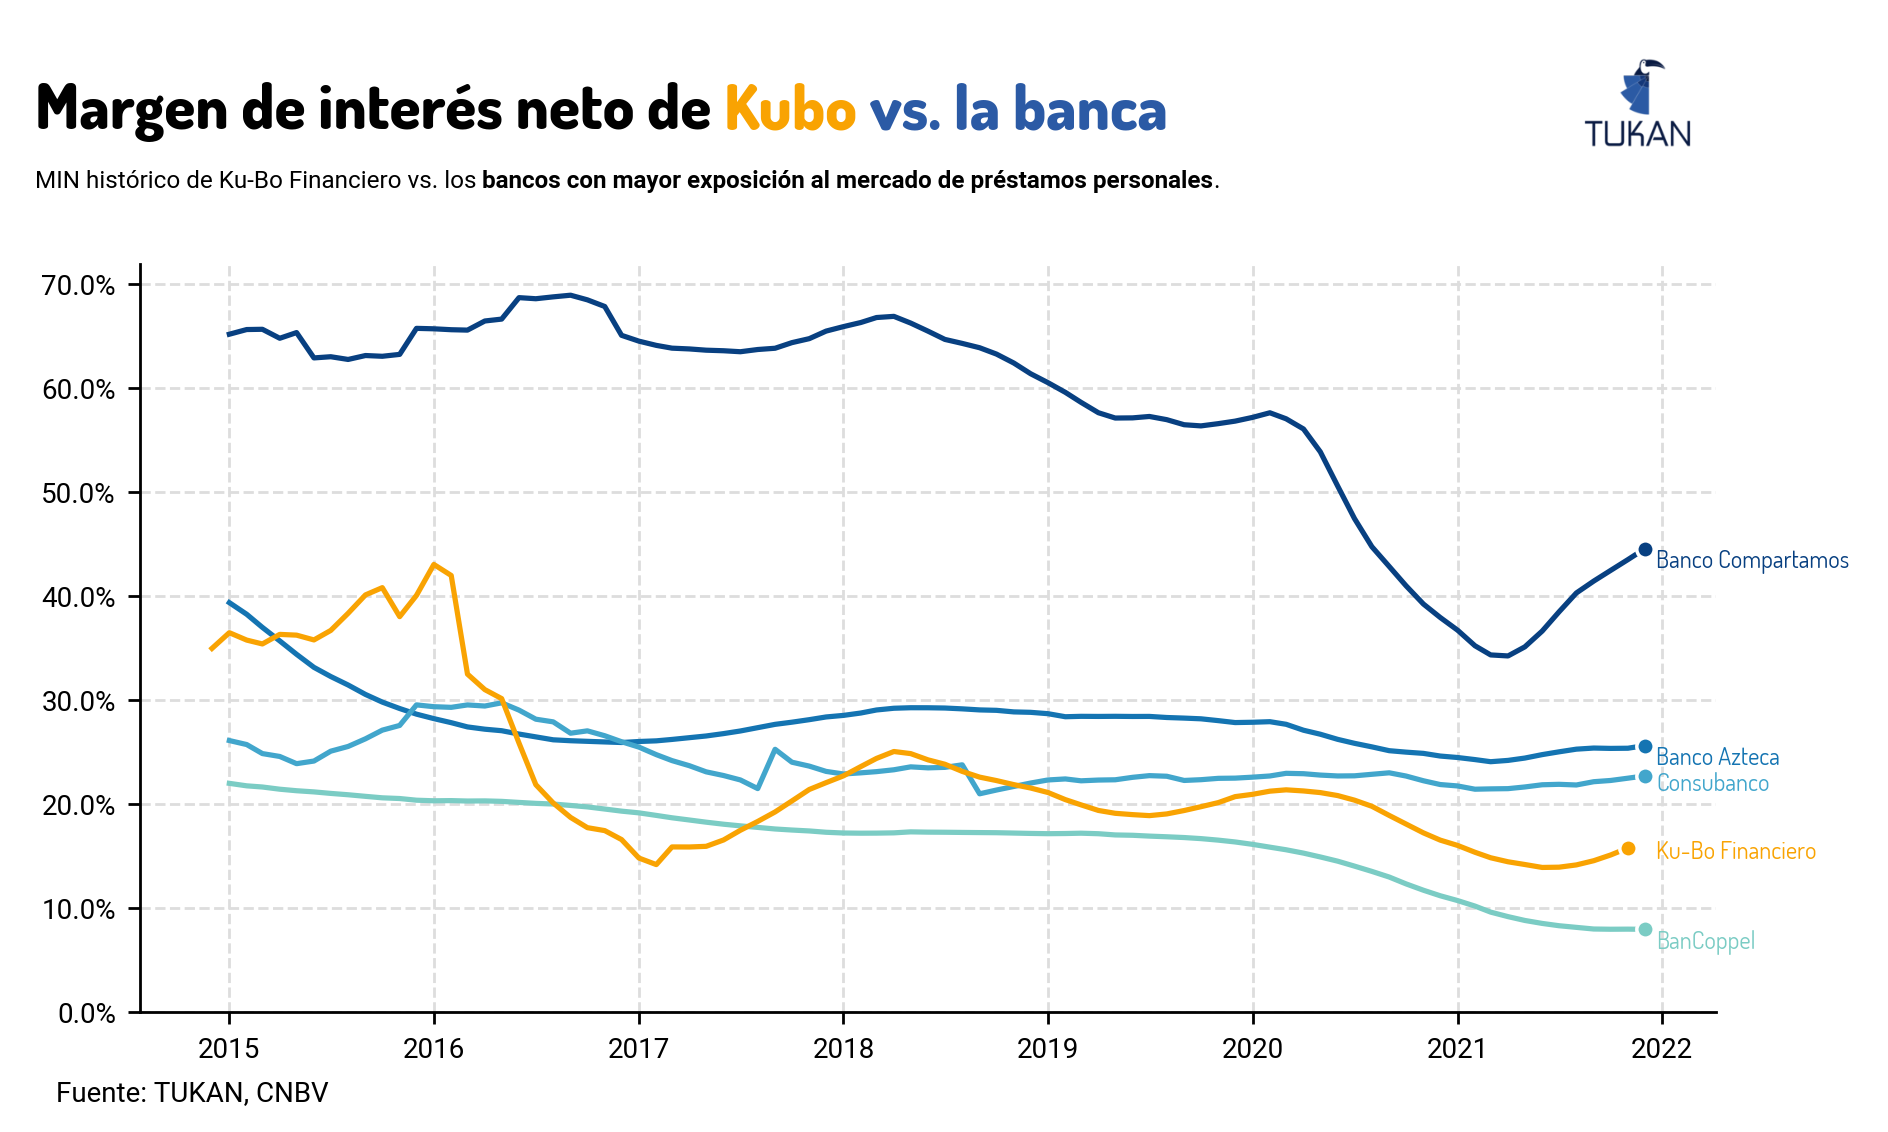

In [342]:
fig = plt.figure(figsize=(7,3.5), dpi = 250, facecolor="white")
ax = plt.subplot(111)


ax.tick_params(axis='both', which='both', labelsize=8)
    
X_min = banks_fin["date"].min()
X_max = banks_fin["date"].max()

sort_activities = banks_fin[banks_fin["date"] == banks_fin["date"].max()].sort_values(by = "nim", ascending = False)
activities = list(sort_activities['institutions'].unique())
cmap = mpl.cm.get_cmap("GnBu_r", 7) # So we don't get very light colors

for index, activity in enumerate(activities):
    plot_banks_fin_aux = banks_fin[banks_fin["institutions"] == activity].copy()
    ax.plot(plot_banks_fin_aux["date"], plot_banks_fin_aux["nim"], marker = "o", markevery = [-1], color = cmap(index), mec = "white", ms = 5)
    Y_end = plot_banks_fin_aux["nim"].iloc[-1]
    if activity == "Consubanco":
        Y_end = Y_end + 0.004
    elif activity == "Fishing & hunting":
        Y_end = Y_end + 0.01
    ax_text(x = X_max + timedelta(20), y = Y_end,
            s = f"<{activity}>",
            highlight_textprops=[{"color": cmap(index)}], 
                                ax = ax, weight = "bold", font = "Dosis", ha = "left", size = 7)

ax.plot(fin_ratios["date"], fin_ratios["nim"], marker = "o", markevery = [-1], color = "#F9A302", mec = "white", ms = 5)
Y_end = fin_ratios["nim"].iloc[-1]
ax_text(x = X_max + timedelta(20), y = Y_end + 0.008,
        s = f"<Ku-Bo Financiero>",
        highlight_textprops=[{"color": "#F9A302"}], 
                            ax = ax, weight = "bold", font = "Dosis", ha = "left", size = 7)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1%}"))

# - Title and subtitle

ax_text(x = 0.02, y = 1.2,
        s = 'Margen de interés neto de <Kubo> <vs. la banca>',
        highlight_textprops = [{"color": "#F9A302"},{"color": "#2B5AA5"}],
        ax = ax, weight = "bold", family = "Dosis", ha = "left", size = 18, annotationbbox_kw = {"xycoords":"figure fraction"})
ax_text(x = 0.02, y = 1.1,
        s = 'MIN histórico de Ku-Bo Financiero vs. los <bancos con mayor exposición al mercado de préstamos personales>.',
        highlight_textprops=[{"weight":"bold"}],
        ax = ax, weight = "normal", family = "Roboto", ha = "left", size = 7, annotationbbox_kw = {"xycoords":"figure fraction"})


# Logo and Caption
plt.tight_layout()

ax.set_ylim(0)

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.8, 1.05, 0.18, 0.18], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

fig.text(0.03, -0.0, "Fuente: TUKAN, CNBV", fontsize=8)

plt.savefig(
    "plots/kubo_nim_vs_bank_ratio.png",
    dpi=300,
    bbox_inches="tight",
    edgecolor="none",
    transparent=True,
)


plt.savefig(
    "plots/kubo_nim_vs_bank_ratio_white.png",
    dpi=250,
    bbox_inches="tight",
    edgecolor="none",
    transparent=False,
)